# Stock Clustering Analysis for Pair Trading

This notebook performs a comprehensive comparison of different clustering methods for identifying potential pair trading opportunities.

## Methods Compared:
1. **Leiden Clustering** - Community detection based on correlation matrix
2. **Louvain Clustering** - Modularity-based community detection
3. **Marsili-Giada Clustering** - Maximum likelihood hierarchical clustering
4. **Industry Clustering** - Traditional industry-based grouping

## Objectives:
- Compare cluster quality across different methods
- Analyze within-cluster correlations (higher = better for pair trading)
- Identify the most cohesive clusters for pair trading strategies
- Visualize cluster structure and inter-cluster relationships

## 1. Import Libraries and Load Data

In [17]:
import sys
import os

# Add the parent directory (FBD2025) to the Python path
sys.path.append(os.path.abspath('../../'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import clustering functions directly
from Leiden_clustering import LeidenCorrelationClustering
from Louvain_clustering import LouvainCorrelationClustering
from Marsili_Giada_clustering import MarsiliGiadaCorrelationClustering
from Utils import cluster_industry, industry_mapping

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


### Load Returns Data


In [18]:
# Note: main_3() loads its own data internally
# We load it here separately for the correlation analysis in later cells

# Build path relative to the notebook location
# FBD_local_data is a sibling folder to FBD2025 (both on Desktop)
data_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), '../../../FBD_local_data/stock_returns.csv')
returns_df = pd.read_csv(data_path, index_col=0, parse_dates=True)

print(f"Data shape: {returns_df.shape}")
print(f"Number of stocks: {returns_df.shape[1]}")
print(f"Time period: {returns_df.index[0]} to {returns_df.index[-1]}")
print(f"\nFirst few rows:")
returns_df.head()

Data shape: (33546, 78)
Number of stocks: 78
Time period: 2008-09-03 13:30:00 to 2008-12-30 21:55:00

First few rows:


,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,USB,UTX,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-03 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-03 13:31:00,-0.002250,0.001810,-0.000582,0.004115,0.000157,-0.004607,0.004860,-0.006833,0.000235,0.001350,...,-0.008583,-0.001504,0.005077,-0.000540,-0.005255,-0.005896,0.000784,0.000000,0.002318,0.002463
2008-09-03 13:32:00,0.001088,0.001353,0.001107,0.002588,-0.001533,0.001289,0.000466,-0.004322,0.001428,0.000641,...,0.000151,-0.004523,0.001368,-0.004179,0.000158,-0.000848,0.002508,0.000759,0.001371,0.003928
2008-09-03 13:33:00,0.000608,0.001509,-0.000765,0.003319,-0.000196,-0.001844,-0.003695,0.000469,0.000953,0.001491,...,0.003328,0.002100,-0.002011,-0.001139,0.000851,0.003238,0.001751,-0.000653,0.002446,0.001652
2008-09-03 13:34:00,0.000229,-0.000401,-0.002311,0.000265,-0.000347,-0.000862,-0.000904,-0.002928,0.000331,0.000199,...,-0.002118,-0.001273,-0.000877,0.000423,-0.001150,0.004099,-0.001529,-0.000965,0.000163,0.000780


## 2. Run Complete Clustering Pipeline

In [19]:
# Run all clustering methods using the loaded returns_df
print("="*70)
print("RUNNING CLUSTERING PIPELINE")
print("="*70)

TICKERS = list(returns_df.columns)

# 1. Leiden Clustering
print("\n1. Running Leiden Clustering...")
leiden_df = LeidenCorrelationClustering(returns_df)
leiden_clusters = leiden_df['cluster'].values
print(f"   Leiden: {leiden_df['cluster'].nunique()} clusters identified")

# 2. Louvain Clustering
print("\n2. Running Louvain Clustering...")
louvain_df = LouvainCorrelationClustering(returns_df)
louvain_clusters = louvain_df.iloc[:, 0].values
print(f"   Louvain: {louvain_df.iloc[:, 0].nunique()} clusters identified")

# 3. Marsili-Giada Clustering
print("\n3. Running Marsili-Giada Clustering...")
marsili_df = MarsiliGiadaCorrelationClustering(returns_df)
marsili_clusters = marsili_df['cluster'].values
print(f"   Marsili-Giada: {marsili_df['cluster'].nunique()} clusters identified")

# 4. Industry-based Clustering
print("\n4. Running Industry-based Clustering...")
industry_clusters_series = cluster_industry(TICKERS)
industry_clusters = industry_clusters_series.values
print(f"   Industry: {industry_clusters_series.nunique()} clusters identified")

# Create results DataFrame
results_df = pd.DataFrame({
    'Leiden_Cluster': leiden_clusters,
    'Louvain_Cluster': louvain_clusters,
    'Marsili_Giada_Cluster': marsili_clusters,
    'Industry_Cluster': industry_clusters
}, index=TICKERS)

print("\n" + "="*70)
print("CLUSTERING COMPLETE")
print("="*70)

print("\nClustering Results Summary:")
print(results_df.head(15))

RUNNING CLUSTERING PIPELINE

1. Running Leiden Clustering...
   Leiden: 4 clusters identified

2. Running Louvain Clustering...
   Louvain: 5 clusters identified

3. Running Marsili-Giada Clustering...
   Louvain: 5 clusters identified

3. Running Marsili-Giada Clustering...


/Users/timot/Desktop/FBD2025/utils/clustering_utils/Marsili_Giada_clustering.py:38: RuntimeWarning: invalid value encountered in log
  return np.log(n / c) + (n - 1) * np.log((n * n - n) / (n * n - c))


 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting
   Marsili-Giada: 38 clusters identified

4. Running Industry-based Clustering...
   Industry: 14 clusters identified

CLUSTERING COMPLETE

Clustering Results Summary:
     Leiden_Cluster  Louvain_Cluster  Marsili_Giada_Cluster  Industry_Cluster
ABT               2                0                      0                 5
AEP               1                2                      1                13
ALL               3                4                      2                 7
APA               0                1                      3                 2
AVP               1                2                      4                 7
AXP               3                4                      5                 3
BA                0                3                      6                 6
BAC               1                2                      7                 3
BAX               2                0                      8    

## 3. Cluster Statistics Comparison

Compare the number of clusters and their sizes across methods

In [20]:
# Calculate statistics for each method
methods = ['Leiden_Cluster', 'Louvain_Cluster', 'Marsili_Giada_Cluster', 'Industry_Cluster']
method_names = ['Leiden', 'Louvain', 'Marsili-Giada', 'Industry']

stats_summary = []

for method, name in zip(methods, method_names):
    n_clusters = results_df[method].nunique()
    cluster_sizes = results_df[method].value_counts().sort_values(ascending=False)
    
    stats = {
        'Method': name,
        'N_Clusters': n_clusters,
        'Largest_Cluster': cluster_sizes.iloc[0],
        'Smallest_Cluster': cluster_sizes.iloc[-1],
        'Avg_Cluster_Size': cluster_sizes.mean(),
        'Std_Cluster_Size': cluster_sizes.std()
    }
    stats_summary.append(stats)

stats_df = pd.DataFrame(stats_summary)
print("\n" + "="*80)
print("CLUSTER STATISTICS COMPARISON")
print("="*80)
print(stats_df.to_string(index=False))
print("\n" + "="*80)


CLUSTER STATISTICS COMPARISON
       Method  N_Clusters  Largest_Cluster  Smallest_Cluster  Avg_Cluster_Size  Std_Cluster_Size
       Leiden           4               25                 9         19.500000          7.141428
      Louvain           5               22                 9         15.600000          6.148170
Marsili-Giada          38                3                 2          2.052632          0.226294
     Industry          14               12                 1          5.571429          3.501962



## 4. Within-Cluster Correlation Analysis

For pair trading, we want clusters with **high internal correlation**. This section calculates the average correlation within each cluster for each method.

In [21]:
# Calculate correlation matrix
corr_matrix = returns_df.corr()

def calculate_cluster_correlations(results_df, corr_matrix, method_col):
    """
    Calculate average within-cluster correlations for a clustering method.
    """
    cluster_corrs = []
    
    for cluster_id in results_df[method_col].unique():
        # Get stocks in this cluster
        cluster_stocks = results_df[results_df[method_col] == cluster_id].index.tolist()
        
        if len(cluster_stocks) > 1:
            # Get sub-correlation matrix for this cluster
            cluster_corr_matrix = corr_matrix.loc[cluster_stocks, cluster_stocks]
            
            # Get upper triangle (excluding diagonal) to avoid counting correlations twice
            mask = np.triu(np.ones_like(cluster_corr_matrix, dtype=bool), k=1)
            correlations = cluster_corr_matrix.where(mask).stack().values
            
            cluster_corrs.append({
                'cluster_id': cluster_id,
                'n_stocks': len(cluster_stocks),
                'avg_correlation': correlations.mean(),
                'min_correlation': correlations.min(),
                'max_correlation': correlations.max(),
                'std_correlation': correlations.std()
            })
        else:
            cluster_corrs.append({
                'cluster_id': cluster_id,
                'n_stocks': len(cluster_stocks),
                'avg_correlation': np.nan,
                'min_correlation': np.nan,
                'max_correlation': np.nan,
                'std_correlation': np.nan
            })
    
    return pd.DataFrame(cluster_corrs)

# Calculate for all methods
correlation_results = {}

for method, name in zip(methods, method_names):
    print(f"\nCalculating correlations for {name}...")
    correlation_results[name] = calculate_cluster_correlations(results_df, corr_matrix, method)

print("\nCorrelation analysis complete!")


Calculating correlations for Leiden...

Calculating correlations for Louvain...

Calculating correlations for Marsili-Giada...

Calculating correlations for Industry...

Correlation analysis complete!


### Display Within-Cluster Correlations for Each Method

In [22]:
for name in method_names:
    print("\n" + "="*80)
    print(f"{name.upper()} - WITHIN-CLUSTER CORRELATIONS")
    print("="*80)
    df = correlation_results[name].sort_values('avg_correlation', ascending=False)
    print(df.to_string(index=False))
    
    # Summary statistics
    valid_corrs = df[df['n_stocks'] > 1]
    if len(valid_corrs) > 0:
        print(f"\nOverall Average Within-Cluster Correlation: {valid_corrs['avg_correlation'].mean():.4f}")
        print(f"Best Cluster (Cluster {valid_corrs.iloc[0]['cluster_id']}): {valid_corrs.iloc[0]['avg_correlation']:.4f}")
    print("="*80)


LEIDEN - WITHIN-CLUSTER CORRELATIONS
 cluster_id  n_stocks  avg_correlation  min_correlation  max_correlation  std_correlation
          0        25         0.435686         0.154987         0.673119         0.104464
          2        22         0.433159         0.265727         0.664249         0.064856
          3         9         0.374924         0.258469         0.505085         0.053804
          1        22         0.368209         0.082530         0.570414         0.102504

Overall Average Within-Cluster Correlation: 0.4030
Best Cluster (Cluster 0.0): 0.4357

LOUVAIN - WITHIN-CLUSTER CORRELATIONS
 cluster_id  n_stocks  avg_correlation  min_correlation  max_correlation  std_correlation
          1         9         0.538737         0.429629         0.671660         0.054335
          0        22         0.433159         0.265727         0.664249         0.064856
          3        19         0.409512         0.108433         0.673119         0.142285
          2        19     

## 5. Comparison of Average Within-Cluster Correlations

In [23]:
# Compare overall performance
comparison = []

for name in method_names:
    df = correlation_results[name]
    valid_corrs = df[df['n_stocks'] > 1]
    
    if len(valid_corrs) > 0:
        comparison.append({
            'Method': name,
            'Avg_Within_Cluster_Corr': valid_corrs['avg_correlation'].mean(),
            'Max_Within_Cluster_Corr': valid_corrs['avg_correlation'].max(),
            'Min_Within_Cluster_Corr': valid_corrs['avg_correlation'].min(),
            'Std_Within_Cluster_Corr': valid_corrs['avg_correlation'].std()
        })

comparison_df = pd.DataFrame(comparison).sort_values('Avg_Within_Cluster_Corr', ascending=False)

print("\n" + "="*80)
print("OVERALL WITHIN-CLUSTER CORRELATION COMPARISON")
print("="*80)
print("Higher values indicate better clustering for pair trading")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


OVERALL WITHIN-CLUSTER CORRELATION COMPARISON
Higher values indicate better clustering for pair trading
       Method  Avg_Within_Cluster_Corr  Max_Within_Cluster_Corr  Min_Within_Cluster_Corr  Std_Within_Cluster_Corr
     Industry                 0.470093                 0.647689                 0.330556                 0.090499
      Louvain                 0.427993                 0.538737                 0.374924                 0.065986
       Leiden                 0.402994                 0.435686                 0.368209                 0.036408
Marsili-Giada                 0.389708                 0.563041                 0.149903                 0.079988


## 6. Visualization: Within-Cluster Correlation Distributions

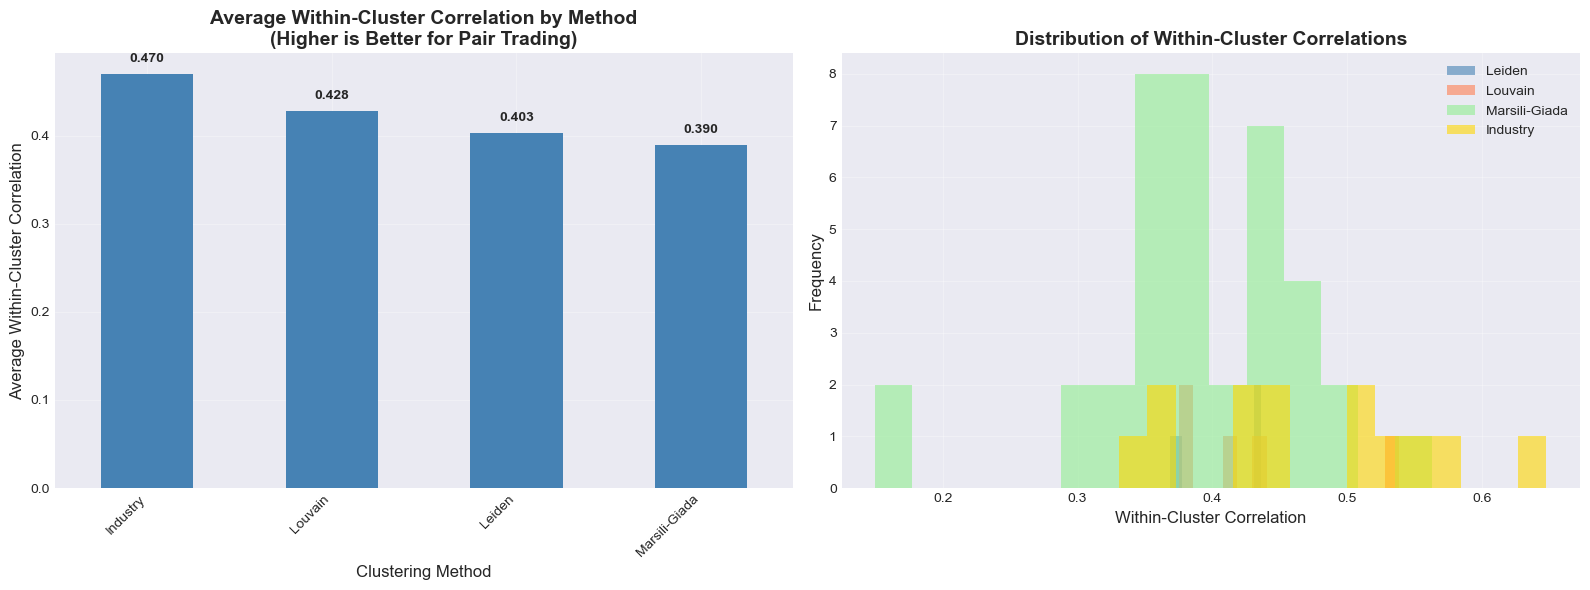

In [24]:
# Create comparison bar plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average within-cluster correlation by method
ax1 = axes[0]
comparison_df.plot(x='Method', y='Avg_Within_Cluster_Corr', kind='bar', ax=ax1, legend=False, color='steelblue')
ax1.set_title('Average Within-Cluster Correlation by Method\n(Higher is Better for Pair Trading)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Clustering Method', fontsize=12)
ax1.set_ylabel('Average Within-Cluster Correlation', fontsize=12)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xticklabels(comparison_df['Method'], rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(comparison_df['Avg_Within_Cluster_Corr']):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Distribution of within-cluster correlations
ax2 = axes[1]
colors = ['steelblue', 'coral', 'lightgreen', 'gold']

for i, name in enumerate(method_names):
    df = correlation_results[name]
    valid_corrs = df[df['n_stocks'] > 1]['avg_correlation'].dropna()
    ax2.hist(valid_corrs, bins=15, alpha=0.6, label=name, color=colors[i])

ax2.set_title('Distribution of Within-Cluster Correlations', fontsize=14, fontweight='bold')
ax2.set_xlabel('Within-Cluster Correlation', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()